In [151]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg
from tqdm import tqdm # progress indicator
#import matplotlib
#matplotlib.use("nbagg")   #подключить эти пакеты для анимации

## Выделение гармонической части гамильтониана
$\frac{H}{E_J}=\frac{p^2}{2ME_J}+\frac{(\varphi-\varphi_{ex})^2}{2lq}+(1-\cos{\varphi})$

Считаем, что импульс в единицах $p_{old} = p_{new}\sqrt{ME_J}$, тогда 
$\frac{p_{old}^2}{2ME_J} = \frac{p_{new}^2}{2} =\frac{p^2}{2} $, а координата $\varphi_{old} = \varphi_{new}\sqrt{lq} = \varphi\sqrt{lq}$.

$\frac{H}{E_J}=\frac{p^2}{2}+\frac{\varphi^2}{2}-\frac{\varphi_{ex}\varphi}{\sqrt{lq}}+\frac{\varphi_{ex}^2}{2lq}+(1-\cos{\varphi\sqrt{lq}})$

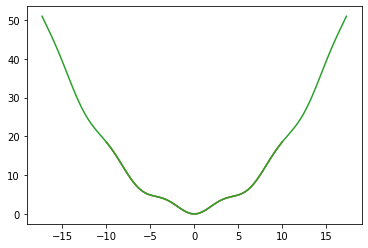

In [152]:
# phix - сдвиг по координате. перенормировка переменной будет влиять на пареметры phix?
def U(phi):
    return (phi - phix)**2/(2*lq) + 1 - np.cos(phi)

def U1(phi):
    return phi**2/2 - phi*phix/np.sqrt(lq) + phix**2/(2*lq) + 1 - np.cos(phi*np.sqrt(lq))

phix = 0#np.pi
lq = 3
x = np.linspace(-10,10,100)
plt.plot(x, U(x))
plt.plot(x, U1(x/np.sqrt(lq))) #обратная замена переменных, новую выражаем через старую
plt.plot(x*np.sqrt(lq), U1(x)) #обратная замена переменных, новую выражаем через старую
plt.show()

## Переход к операторам рождения и уничтожения

$x_{new} = \frac{a+a^+}{\sqrt2}$

$\frac{H}{E_J} = N + (3/2+\frac{\varphi_{ex}^2}{2lq})E - \frac{\varphi_{ex}}{\sqrt{2lq}}(a+a^+) -\cos(\sqrt{\frac{lq}{2}}(a+a^+)
) $

In [157]:
S = 1000 #размерность матрицы   
#S_test = 5000
 
# параметры графика
width = 8
high = 6

In [158]:
def N(S):
    N = np.zeros((S,S))
    for i in range(1,S):
        N[i][i] = i
    return N

def a_crtn(S):
    a_crtn = np.zeros((S,S))
    for i in range(1,S):
        a_crtn[i-1][i] = np.sqrt(i)
    return a_crtn
    
def a_anh(S):
    a_anh = np.zeros((S,S))
    for i in range(1,S):
        a_anh[i][i-1] = np.sqrt(i)
    return a_anh
# используем в основном a_crtn + a_anh = a

def a(S):
    a = np.zeros((S,S))
    for i in range(1,S):
        a[i-1][i] = a[i][i-1] = np.sqrt(i)
    return a

## Блок поиска cos от матрицы a

Тут надо написать теорио, которой я руководствуюсь

1. $J = H^{-1}AH$

2. $f(J)$

3. $f(A) = Hf(J)H^{-1}$

В данном случае J - матрица, где по дигоналям собственные значения. Но это пока не доказано. Женская интуиция - вещь.
Еще собственные значения a не должны быть вырождены. Это значит, что все жордановы ячейки, скорее всего, будут единичны и без единицы над верхней диагональю ячейки.

In [160]:
eigvals_a, eigvecs_a = linalg.eigh(a(S)) 


In [161]:
#обратная матрица H^(-1)
eigvecs_a_inv = linalg.inv(eigvecs_a)

In [139]:
b = np.unique(eigvals_a)
if len(b)==len(eigvals_a):
    print("Кождое собственное значение уникально")
else:
    print("Надо делать разложение по матрицам Жордана")

Кождое собственное значение уникально


In [162]:
# жорданова форма матрицы а. 
# В данном случае больше смысла говорить о ее диагональном предсавлении
def J(S):
    j = np.zeros((S,S))
    for i in range(S):
        j[i,i] = eigvals_a[i]
    return j

# ---------------------------------
# строит матрицу
#plt.imshow(J(S))#,interpolation="bicubic")
#plt.colorbar()
#plt.show()  

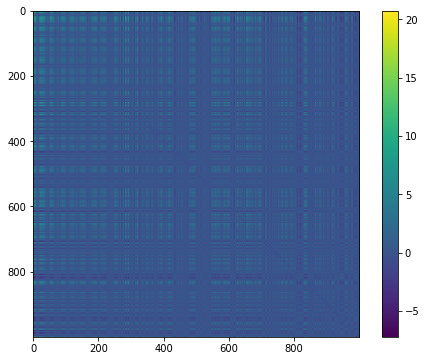

In [163]:
#cos(J)
func = np.cos(np.sqrt(lq/2)*J(S))
# --------------------------------
# переход к начальному базису (обратное преобразование)
cos_a = eigvecs_a.dot(func).dot(eigvecs_a_inv) 
#cos_a = np.linalg.multi_dot([eigvecs_a, func, eigvecs_a_inv])
 

# ---------------------------------
# строит матрицу
plt.figure(figsize=(width,high))
plt.imshow(cos_a)#,interpolation="bicubic")
plt.colorbar()
plt.show()


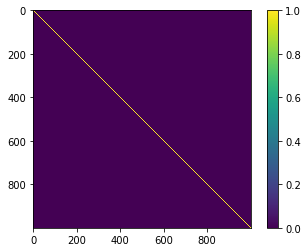

In [164]:
# проверка правильности опредееления обратной матрицы (было хуже)

plt.imshow(np.dot(eigvecs_a_inv, eigvecs_a))#, eigvecs_a_inv))
plt.colorbar()
plt.show()

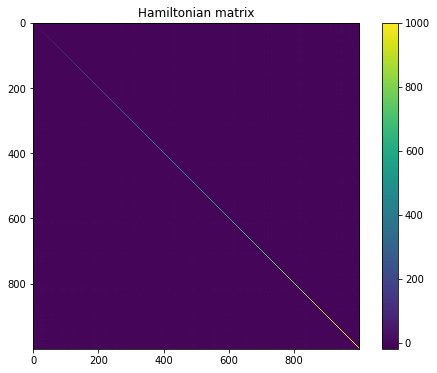

In [165]:
H = N(S) + (3/2 + phix**2/(2*lq))*np.eye(S) - phix/np.sqrt(2*lq)*a(S) - cos_a
plt.figure(figsize=(width,high))
plt.imshow(H)#, interpolation="bicubic")
plt.title("Hamiltonian matrix")
plt.colorbar()
plt.show()

In [166]:
eigvals, eigvecs = linalg.eigh(H)

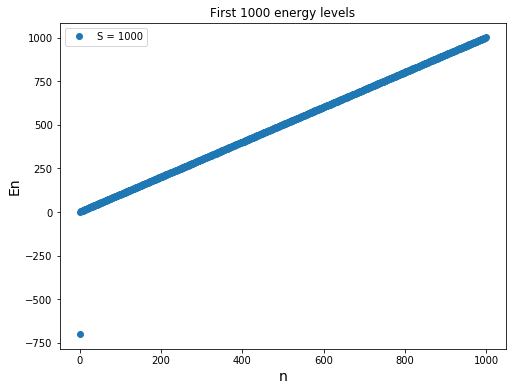

In [168]:
en_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvals[:en_plot_num], 'o',label="S = {}".format(S))
#plt.plot(eigvals_test[:en_plot_num], 'o',label="S_test = {}".format(S_test))
plt.xlabel("n",size=14)
plt.ylabel("En",size=14)
plt.legend()
plt.title("First {} energy levels".format(en_plot_num))
plt.show()

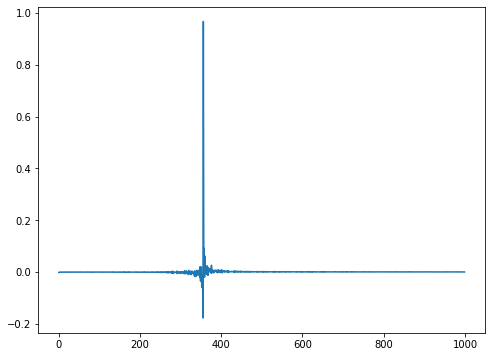

In [172]:
n_plot_num = S
plt.figure(figsize=(width,high))
plt.plot(eigvecs[:,356], label="S = {}".format(S))
#plt.plot(eigvals_test[:en_plot_num], 'o',label="S_test = {}".format(S_test))
plt.show()